In [29]:
import pandas as pd
from pandas.core.arrays.sparse import SparseArray as _SparseArray
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
import scipy.stats as stats

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

So, essentialy Yulu wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

So just starting here with default steps to understand the data.

In [30]:
df_yulu = pd.read_csv('/Users/Ramv/Downloads/bike_sharing.csv')

df_yulu.shape

(10886, 12)

In [31]:
df_yulu.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [32]:
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Columns Description:
datetime: The date and time of bike rentals (currently in object format, may need conversion to datetime).
    
season: Categorical (1: spring, 2: summer, 3: fall, 4: winter).
    
holiday: Binary (0 or 1), indicating if the day is a holiday.
    
workingday: Binary (0 or 1), indicating if the day is a working day.
    
weather: Categorical, describing the weather conditions.
    
temp: Numeric, temperature in Celsius.
    
atemp: Numeric, 'feels like' temperature in Celsius.
    
humidity: Numeric, percentage humidity.
    
windspeed: Numeric, wind speed.
    
casual: Numeric, count of casual users.
    
registered: Numeric, count of registered users.
    
count: Numeric, total count of rented bikes (casual + registered).

In [33]:
df_yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


Missing Value Detection:
The initial overview indicated that there are no missing values in any of the columns. However, a deeper check for missing or null values can be performed for assurance.

In [34]:
df_yulu.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

Observations on Shape of Data:     
The dataset contains 10,886 entries and 12 columns.

Data Types of All the Attributes:
The dataset primarily consists of numeric (int64 and float64) and one object type (datetime) columns.
The 'datetime' column is in object format and should ideally be converted to a datetime data type for better analysis.


Conversion of Categorical Attributes to 'Category':
We haven't yet converted categorical variables like 'season', 'holiday', 'workingday', and 'weather' to 'category' data type. This conversion can optimize memory usage and is beneficial for certain types of analysis.


# Problem Statement in detail:


"Identify and quantify the key factors affecting the demand for shared electric bikes in an Urban Environment"

This problem statement involves several dimensions:

Temporal Analysis:
Understanding how demand varies with time – hourly, daily, weekly, and seasonally.
Investigating the impact of special days (holidays and working days) on bike usage patterns.

Weather Dependence:
Examining the relationship between weather conditions (clear, cloudy, rain, etc.) and e-bike rental demand.
Analyzing how temperature, 'feels like' temperature, humidity, and wind speed affect the usage of bikes.

User Segmentation:
Differentiating between casual and registered users in terms of usage patterns.
Exploring demographic or other available data to understand different user behaviors.

External Factors:
Considering external factors like public transport strikes, urban infrastructure changes, or significant local events.
Assessing the impact of competitive services or changes in urban mobility trends.

In [35]:
df_yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


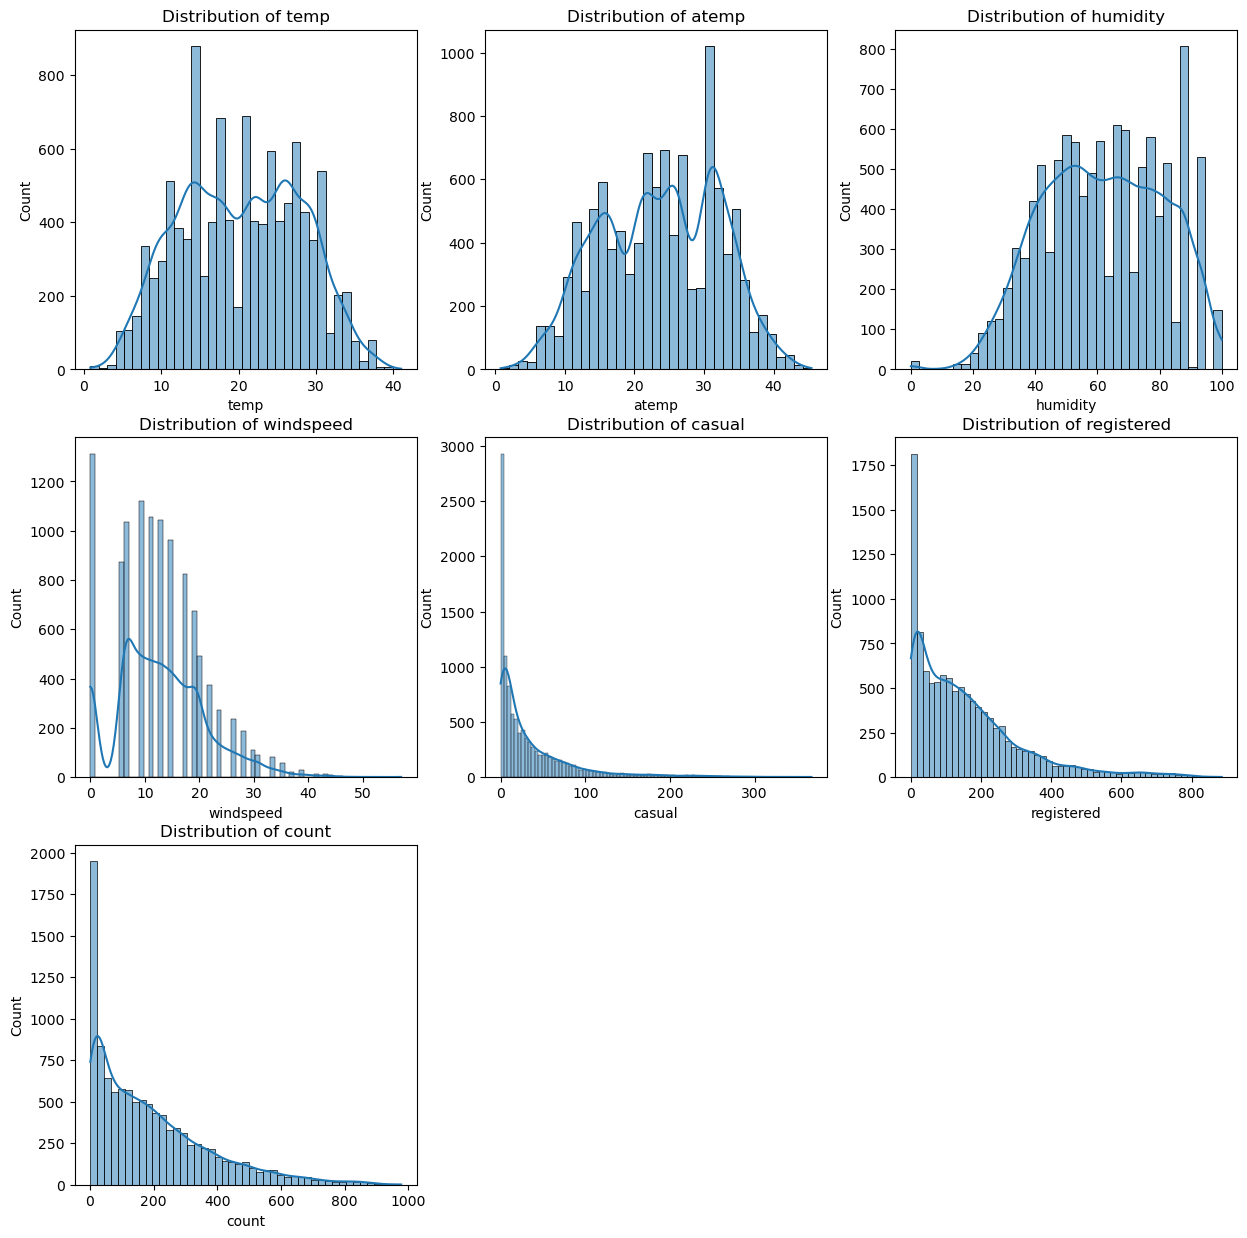

In [36]:
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plt.figure(figsize=(15, 15))
i = 1
for var in continuous_vars:
    plt.subplot(3, 3, i)
    sns.histplot(df_yulu[var], kde=True)
    plt.title(f'Distribution of {var}')
    i = i+1
plt.show()

Data in columns 'casual', 'windspeed and 'registered' are all right-skewed while 'temp', 'atemp' and 'humidity'.
are more close to normal distribution.

Temperature (temp) and 'Feels Like' Temperature (atemp): Both show similar distributions, indicating a reasonable spread across different temperatures.
    
Humidity (humidity): The distribution is somewhat uniform but with a slight increase in frequency at higher humidity levels.
    
Wind Speed (windspeed): Most of the data points are clustered at lower wind speeds, indicating that high wind speeds are less common.
    
Casual (casual): The distribution is right-skewed, suggesting that there are many instances with few casual users and fewer instances with a large number of casual users.
    
Registered (registered): Similar to 'casual', but with a slightly less pronounced right skew. This indicates a higher overall usage by registered users.
    
Total Count (count): Reflects the combined effect of 'casual' and 'registered', showing a right-skewed distribution indicating more instances of lower total usage.

In [37]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_columns:
    df_yulu[col] = df_yulu[col].astype('category')

df_yulu['datetime'] = pd.to_datetime(df_yulu['datetime'])
df_yulu['year'] = df_yulu['datetime'].dt.year
df_yulu['month'] = df_yulu['datetime'].dt.month

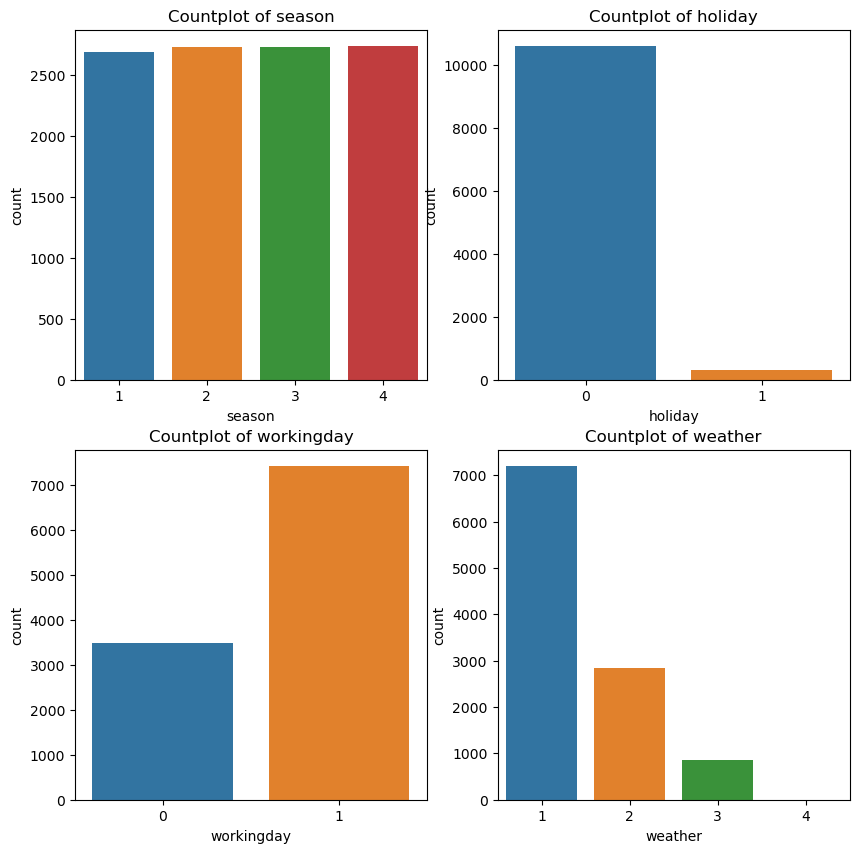

In [28]:
# Countplots for categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather']
i = 1
plt.figure(figsize=(10, 10))
for var in categorical_vars:
    plt.subplot(2, 2, i)
    sns.countplot(x=df_yulu[var])
    plt.title(f'Countplot of {var}')
    i += 1
plt.show()

While seasons has equal distributions among its groups, categories 'workingday', 'holiday', 'weather' has clear disparity among their groups.

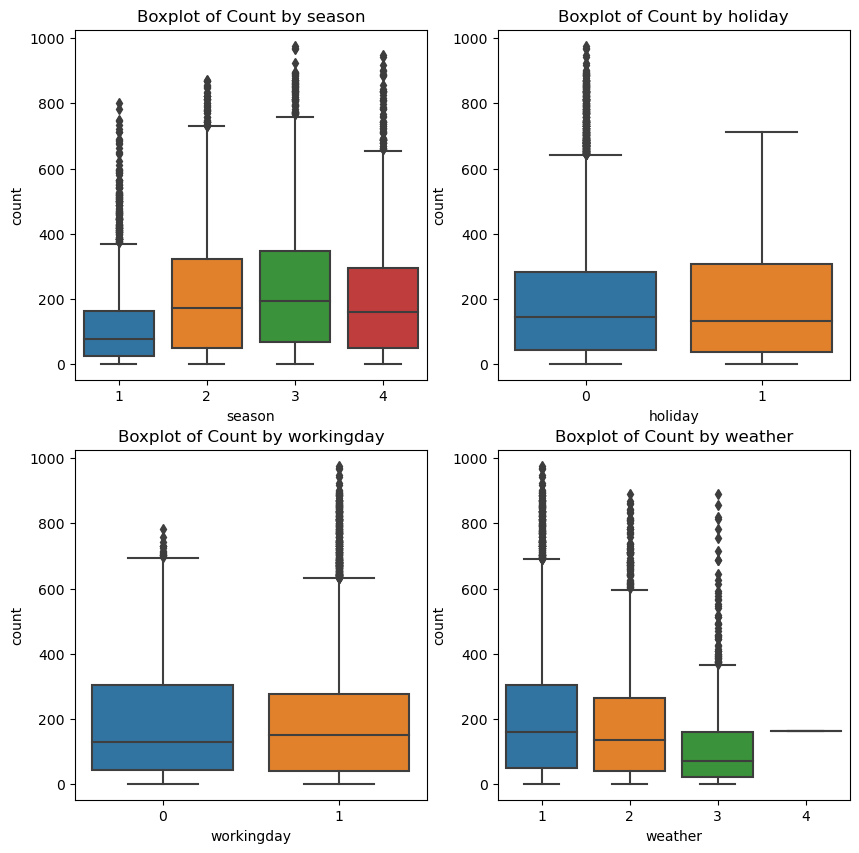

In [25]:
# Relationship between categorical variables and count
i = 1
plt.figure(figsize=(10, 10))
for var in categorical_vars:
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, y='count', data=df_yulu)
    i += 1
    plt.title(f'Boxplot of Count by {var}')
plt.show()

Categorical Variables:

Season (season): The dataset seems to have a relatively balanced distribution across different seasons.

Holiday (holiday): There are significantly fewer days classified as holidays compared to non-holidays.
    
Working Day (workingday): More days are classified as working days than non-working days.
    
Weather (weather): Most days fall into the first two weather categories (clear/few clouds and mist/cloudy), with very few instances of the more severe weather conditions (categories 3 and 4).

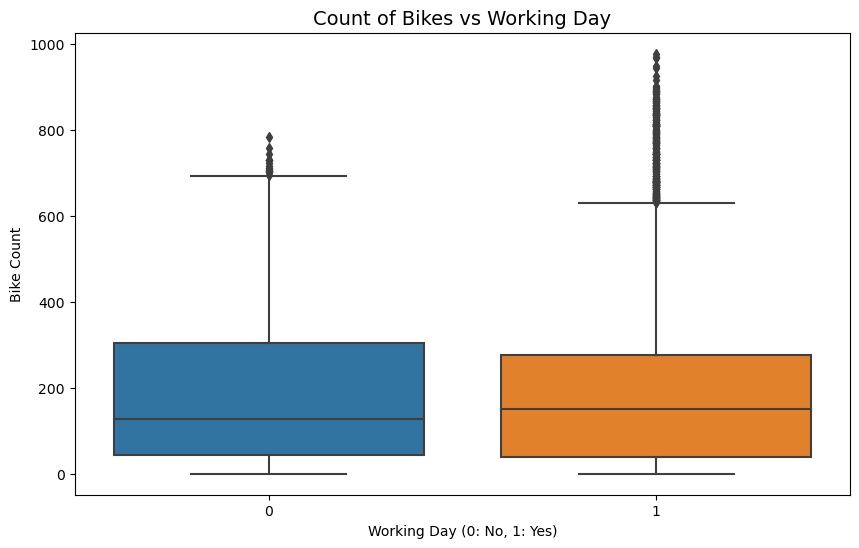

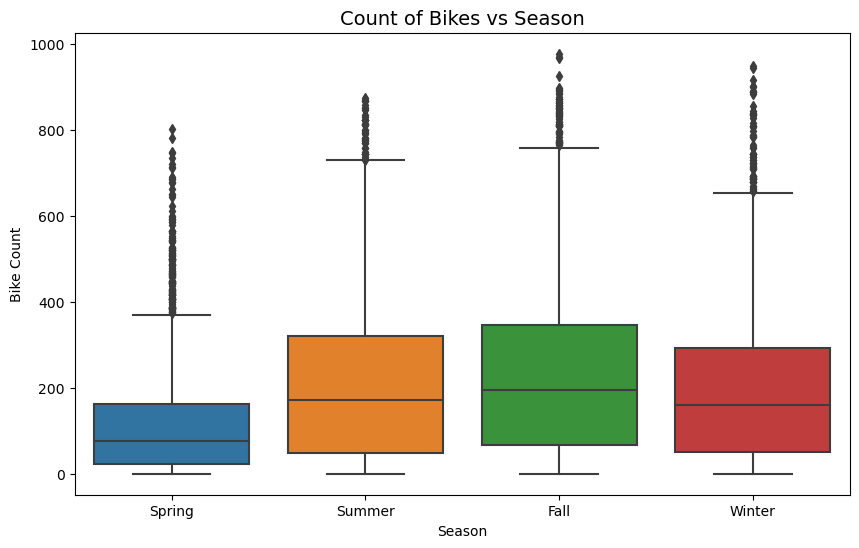

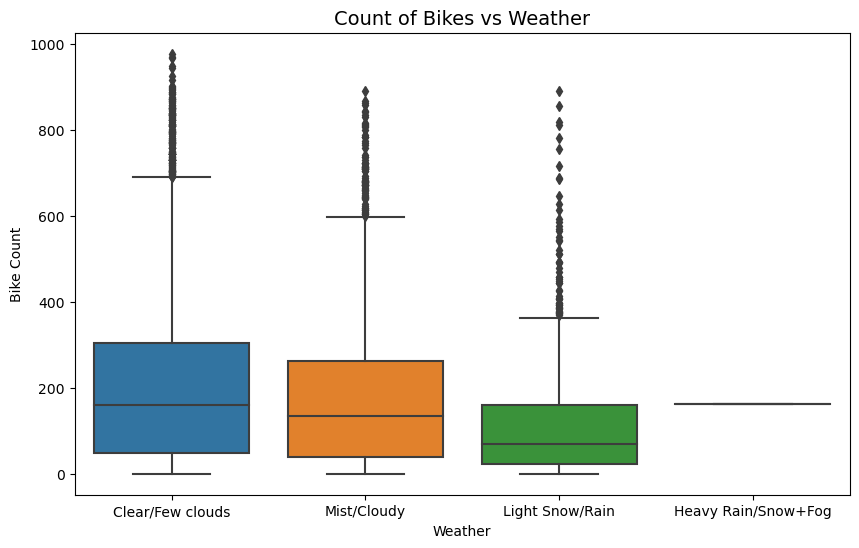

In [39]:
# Bivariate Analysis: Exploring relationships between important categorical variables and 'count'

# Mapping for seasons
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Mapping for weather
weather_mapping = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow+Fog'
}

# Adjusting the figure size and layout to have larger boxplots, one per row with renamed x-axis labels

# Relationship between 'workingday' and 'count'
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='count', data=df_yulu)
plt.title('Count of Bikes vs Working Day', fontsize=14)
plt.xlabel('Working Day (0: No, 1: Yes)')
plt.ylabel('Bike Count')
plt.show()

# Relationship between 'season' and 'count'
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=df_yulu)
plt.title('Count of Bikes vs Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Bike Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=season_mapping.values())  # Renaming x-axis labels for seasons
plt.show()

# Relationship between 'weather' and 'count'
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=df_yulu)
plt.title('Count of Bikes vs Weather', fontsize=14)
plt.xlabel('Weather')
plt.ylabel('Bike Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=weather_mapping.values())  # Renaming x-axis labels for weather
plt.show()

# Summary:

In [ ]:
The EDA revealed valuable insights into the factors affecting bike rental demand. Seasonal changes, weather conditions, and whether a day is a working day significantly impact bike usage. The data also indicated potential areas for further investigation, such as the reasons behind the outliers in bike rental counts.

# Hypothesis for 2-Sample T-Test:

To conduct a 2-sample t-test to evaluate if there's a significant difference in the number of electric cycles rented on working days versus non-working days, we'll follow these step:

Null Hypothesis (H0): The mean number of electric cycles rented is the same on working days and non-working days.

Alternative Hypothesis (H1): The mean number of electric cycles rented is different on working days compared to non-working days.

Assumptions for the Test:
The samples are independent.
The samples are randomly drawn from the population.
The data follows a normal distribution, or the sample size is large enough to apply the Central Limit Theorem.

Test Procedure: Separate the counts of rented cycles into two groups based on whether the day is a working day or not. Perform the 2-sample t-test to compare the means of these two groups. Evaluate the p-value to determine if the result is statistically significant (typically using a significance level of 0.05).

In [41]:
from scipy.stats import ttest_ind

In [42]:
# Separate the counts based on working day
working_day_count = df_yulu[df_yulu['workingday'] == 1]['count']
non_working_day_count = df_yulu[df_yulu['workingday'] == 0]['count']

# Perform 2-sample t-test
t_stat, p_value = ttest_ind(working_day_count, non_working_day_count)

t_stat, p_value

(1.2096277376026694, 0.22644804226361348)

T-Statistic: 1.21 P-Value: Approximately 0.226

Interpretation:

Since the p-value (0.226) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This implies that, based on our sample data, there is not enough evidence to conclude that the mean number of electric cycles rented significantly differs between working days and non-working days.

Conclusion:

The test suggests that the status of the day (whether it is a working day or not) does not have a statistically significant impact on the number of electric cycles rented. However, it is important to consider other factors that might interact with the day's status, such as weather, season, or holidays, which could influence this outcome.

# ANOVA Test:

Hypothesis: Number of Cycles rented in different Seasons

Null Hypothesis (H0): The mean number of electric cycles rented is the same across different seasons.

Alternative Hypothesis (H1): The mean number of electric cycles rented differs across seasons.

In [44]:
from scipy.stats import shapiro, levene, f_oneway
# Check for Normality (Shapiro-Wilk test)
shapiro_test_seasons = {season: shapiro(df_yulu[df_yulu['season'] == season]['count']) 
                        for season in df_yulu['season'].cat.categories}

# Check for Equal Variance (Levene's test)
count_by_season = [df_yulu[df_yulu['season'] == season]['count'] 
                   for season in df_yulu['season'].cat.categories]
levene_test = levene(*count_by_season)

# ANOVA Test (as there are more than two groups - different seasons)
anova_test = f_oneway(*count_by_season)

shapiro_test_seasons, levene_test, anova_test

({1: ShapiroResult(statistic=0.808738648891449, pvalue=0.0),
  2: ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39),
  3: ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36),
  4: ShapiroResult(statistic=0.8954646587371826, pvalue=1.1302396971766104e-39)},
 LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118),
 F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149))

# Normality Check (Shapiro-Wilk Test):

For all seasons, the p-values are extremely low (close to 0). This suggests that the data for each season does not follow a normal distribution.
Equal Variance Check (Levene's Test):

The p-value is significantly low (practically 0), indicating that the variances across different seasons are not equal.
ANOVA Test:

The F-statistic is quite high (236.95), and the p-value is extremely low (close to 0).
This result suggests there are significant differences in the mean number of cycles rented across different seasons.
Interpretation and Inference:

Despite the assumptions of normality and equal variance not being fully met, the ANOVA test strongly indicates that the mean number of cycles rented varies significantly across different seasons.
Given the large sample size, the ANOVA test remains robust even if the normality assumption is not strictly met.
The conclusion is that we reject the null hypothesis (H0) and accept the alternative hypothesis (H1): The number of electric cycles rented is different across seasons.

# Hypothesis for ANOVA (Weather Conditions):

Null Hypothesis (H0): The mean number of electric cycles rented is the same across different weather conditions.

Alternative Hypothesis (H1): The mean number of electric cycles rented differs across weather conditions.

The Shapiro-Wilk test for normality encountered an issue because one or more weather categories do not have enough data points (at least 3) to perform the test. This situation can arise if certain weather conditions are very rare in the dataset.

Given this limitation, we can still proceed with the ANOVA test for the different weather conditions, keeping in mind the following:

The normality assumption may not be fully met for all categories.
The ANOVA test is generally robust to violations of normality, especially with large sample sizes.

In [45]:
count_by_weather = [df_yulu[df_yulu['weather'] == weather]['count'] 
                    for weather in df_yulu['weather'].cat.categories]

# Re-performing Levene's test for equal variances
levene_test_weather = levene(*count_by_weather)

# Re-performing ANOVA Test for different weather conditions
anova_test_weather = f_oneway(*count_by_weather)

levene_test_weather, anova_test_weather

(LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35),
 F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42))

# Equal Variance Check (Levene's Test):

The Levene's test resulted in a p-value of approximately 3.504937946833238e-35 , which is significantly low. This suggests that the variances across different weather conditions are not equal.

ANOVA Test: The ANOVA test yielded an F-statistic of approximately 65.53, with a very low p-value (5.482069475935669e-42). 

This indicates a significant difference in the mean number of cycles rented across different weather conditions.

Interpretation and Inference:

Despite the assumption of equal variance not being met, the ANOVA test indicates significant differences in the mean number of cycles rented across different weather conditions.

Given the robustness of ANOVA, especially with large sample sizes, we can confidently conclude that the number of electric cycles rented varies significantly with weather conditions.

We reject the null hypothesis (H0) and accept the alternative hypothesis, (H1): The mean number of electric cycles rented differs across weather conditions.

# Chi-Square Test

Hypothesis: to check if weather conditions are dependent on the season.

Null Hypothesis (H0): Weather conditions are independent of the season.

Alternative Hypothesis (H1): Weather conditions are dependent on the season.

Test Procedure:

Create a contingency table (cross-tabulation) of weather conditions versus seasons.
Perform the Chi-square test of independence on this table.
Evaluate the p-value to determine if the result is statistically significant (typically using a significance level of 0.05).

In [46]:
from scipy.stats import chi2_contingency

In [47]:
# Creating a contingency table of weather conditions vs seasons
contingency_table = pd.crosstab(df_yulu['season'], df_yulu['weather'])

# Perform Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value, dof, expected

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

Chi-Square Test Results:

Chi-Square Statistic: approx. 49.16
    
P-Value: approx. 1.549925073686492e-07
    
Degrees of Freedom: 9
    
    
Interpretation:

The p-value is significantly low (1.549925073686492e-07), far below the typical significance level of 0.05.
This result indicates that the observed frequency distribution of weather conditions across different seasons significantly deviates from what would be expected if they were independent.

Inference:

We reject the null hypothesis (H0) and accept the alternative hypothesis (H1): Weather conditions are dependent on the season. This implies that the likelihood of experiencing certain types of weather conditions varies with the season, which is a logical outcome considering seasonal weather patterns.

# Conclusion and Recommendations:

Seasonal and Weather Considerations: Yulu should consider seasonal and weather variations in their operational and marketing strategies. 

For example, increasing fleet availability during favorable seasons and weather conditions could boost usage.

Focus on Working Days: While working days did not show a significant difference in rentals statistically, operational focus during these days might still be beneficial given the slightly higher usage trends.
    
Data-Driven Decisions: The insights from this analysis should be utilized to make data-driven decisions for resource allocation, marketing campaigns, and strategic planning.
    
Continuous Monitoring: Ongoing analysis of usage patterns, especially in response to changes in weather, urban infrastructure, and customer preferences, is recommended.